In [1]:
import ast
from datasets import load_dataset

In [2]:
import logging
logging.getLogger("langchain_core.vectorstores.base").setLevel(logging.ERROR)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from chatsky_llm_autoconfig.algorithms.three_stages_0 import ThreeStagesGraphGenerator
from chatsky_llm_autoconfig.dialogue import Dialogue

/home/peshkichev/miniconda3/envs/py11/lib/python3.11/site-packages/pydantic/_internal/_fields.py:192: UserWarning: Field name "validate" in "Dialogue" shadows an attribute in parent "BaseModel"
  warnings.warn(


In [ ]:
dataset = load_dataset('Salesforce/dialogstudio', 'MULTIWOZ2_2', token="", trust_remote_code=True)

In [4]:
dataset['test'][0]

{'original dialog id': 'PMUL3520.json',
 'new dialog id': 'MULTIWOZ2_2--test--1',
 'dialog index': 1,
 'original dialog info': '{"services": ["restaurant", "train"]}',
 'log': [{'turn id': 1,
   'user utterance': 'I need a train going to Cambridge that will depart after 10:15 from broxbourne.',
   'system response': 'I have train TR5678 that would suit you.',
   'dialog history': '',
   'original user side information': '{"frames": [{"actions": [], "service": "train", "slots": [{"exclusive_end": 62, "slot": "train-leaveat", "start": 57, "value": "10:15"}], "state": {"active_intent": "find_train", "requested_slots": [], "slot_values": {"train-departure": ["broxbourne"], "train-destination": ["cambridge"], "train-leaveat": ["10:15"]}}}, {"actions": [], "service": "taxi", "slots": [], "state": {"active_intent": "NONE", "requested_slots": [], "slot_values": {}}}, {"actions": [], "service": "bus", "slots": [], "state": {"active_intent": "NONE", "requested_slots": [], "slot_values": {}}}, {"

In [28]:
data = [d for d in dataset['test'] if ast.literal_eval(d['original dialog info'])["services"]==["restaurant"]]

In [77]:
data = [d for d in dataset['test'] if ast.literal_eval(d['original dialog info'])["services"]==["restaurant", "train"]]

In [6]:
data = [d for d in dataset['test'] if ast.literal_eval(d['original dialog info'])["services"]==["train"]]

In [29]:
data[0]

{'original dialog id': 'SNG0661.json',
 'new dialog id': 'MULTIWOZ2_2--test--6',
 'dialog index': 6,
 'original dialog info': '{"services": ["restaurant"]}',
 'log': [{'turn id': 1,
   'user utterance': "I'm looking for an Indian restaurant, preferably in the centre of town.",
   'system response': 'There are a number of options for Indian restaurants in the centre of town. What price range would you like?',
   'dialog history': '',
   'original user side information': '{"frames": [{"actions": [], "service": "restaurant", "slots": [{"exclusive_end": 25, "slot": "restaurant-food", "start": 19, "value": "Indian"}], "state": {"active_intent": "find_restaurant", "requested_slots": [], "slot_values": {"restaurant-area": ["centre"], "restaurant-food": ["indian"]}}}, {"actions": [], "service": "taxi", "slots": [], "state": {"active_intent": "NONE", "requested_slots": [], "slot_values": {}}}, {"actions": [], "service": "train", "slots": [], "state": {"active_intent": "NONE", "requested_slots":

In [30]:
len(data)

65

In [7]:
new_data=[]
for d in data:
    exist = [[{"text":u['user utterance'],"participant":"user"},{"text":u['system response'],"participant":"assistant"}] for u in d['log']]
    new_data.append([{"text":"Hello! How can I help you?","participant":"assistant"}] + [x for xs in exist for x in xs])

In [38]:
new_data[0]

[{'text': 'Hello! How can I help you?', 'participant': 'assistant'},
 {'text': 'Yes, I am looking for a train that will be leaving after 13:30 on Tuesday.',
  'participant': 'user'},
 {'text': 'What is your destination?', 'participant': 'assistant'},
 {'text': 'The train should go to cambridge and should depart from london liverpool street.',
  'participant': 'user'},
 {'text': 'TR1395 leaves london liverpool street for Cambridge on Tuesday at 13:39 and arrives by 15:07.',
  'participant': 'assistant'},
 {'text': 'Could you book that for 8 people, please?', 'participant': 'user'},
 {'text': 'Booking was successful, the total fee is 132.8 GBP payable at the station . Reference number is : LXVNUONW .',
  'participant': 'assistant'},
 {'text': "Thanks, that's all I need. Good bye.", 'participant': 'user'},
 {'text': 'Glad to have helped. Goodbye.', 'participant': 'assistant'}]

In [93]:
new_data[4]

[{'text': 'Hello! How can I help you?', 'participant': 'assistant'},
 {'text': 'I am looking for a train that will depart on Sunday and arrive by 18:00.',
  'participant': 'user'},
 {'text': 'I have found the listings for the Sunday departures. What is your destination? Would you like me to book a trip?',
  'participant': 'assistant'},
 {'text': 'I am going to Cambridge from Leicester. And, yes, please book it for me.',
  'participant': 'user'},
 {'text': 'For how many tickets?', 'participant': 'assistant'},
 {'text': '7 please', 'participant': 'user'},
 {'text': 'Your booking was successful. Train ID is TR1079. Total fee is 211.67 GBP. Reference number is YFF7DKYH . Anything else I can help with today?',
  'participant': 'assistant'},
 {'text': 'thank you!', 'participant': 'user'},
 {'text': "I'm glad I could help. Is there anything else?",
  'participant': 'assistant'},
 {'text': "That's all, thank you !", 'participant': 'user'},
 {'text': 'Excellent. Have a great day!', 'participant

In [37]:
new_data[1]

[{'text': 'Hello! How can I help you?', 'participant': 'assistant'},
 {'text': "I'm looking for a train please.", 'participant': 'user'},
 {'text': 'There are several trains, where do you want to go?',
  'participant': 'assistant'},
 {'text': 'I need to go to Norwich from Cambridge.', 'participant': 'user'},
 {'text': 'What day will you be traveling, please?',
  'participant': 'assistant'},
 {'text': 'I will be traveling on Friday.', 'participant': 'user'},
 {'text': 'What time do you plan to leave Cambridge?',
  'participant': 'assistant'},
 {'text': 'any time on friday, arrive by 1515hrs. get me the train id please',
  'participant': 'user'},
 {'text': 'TR3034 arrives by 14:55, would you like to book a seat?',
  'participant': 'assistant'},
 {'text': 'yes please. help me get train ID and travel time',
  'participant': 'user'},
 {'text': 'All set, the total fee is 17.6 GBP payable at the station. Reference number 4CUZ9L1G . Travel time is 79 minutes',
  'participant': 'assistant'},
 {

In [5]:
graph_generator = ThreeStagesGraphGenerator()

In [39]:
[Dialogue.from_list(c) for c in new_data[:2]]

[Dialogue(messages=[DialogueMessage(text='Hello! How can I help you?', participant='assistant'), DialogueMessage(text='Yes, I am looking for a train that will be leaving after 13:30 on Tuesday.', participant='user'), DialogueMessage(text='What is your destination?', participant='assistant'), DialogueMessage(text='The train should go to cambridge and should depart from london liverpool street.', participant='user'), DialogueMessage(text='TR1395 leaves london liverpool street for Cambridge on Tuesday at 13:39 and arrives by 15:07.', participant='assistant'), DialogueMessage(text='Could you book that for 8 people, please?', participant='user'), DialogueMessage(text='Booking was successful, the total fee is 132.8 GBP payable at the station . Reference number is : LXVNUONW .', participant='assistant'), DialogueMessage(text="Thanks, that's all I need. Good bye.", participant='user'), DialogueMessage(text='Glad to have helped. Goodbye.', participant='assistant')], validate=True),
 Dialogue(me

In [ ]:
result_graph = graph_generator.invoke([Dialogue.from_list(c) for c in new_data[:2]])

NODES:  {'nodes': [{'id': 1, 'label': 'start', 'is_start': True, 'utterances': ['Hello! How can I help you?']}, {'id': 2, 'label': 'ask_destination', 'is_start': False, 'utterances': ['What is your destination?', 'There are several trains, where do you want to go?']}, {'id': 3, 'label': 'ask_travel_details', 'is_start': False, 'utterances': ['What day will you be traveling, please?', 'What time do you plan to leave Cambridge?']}, {'id': 4, 'label': 'provide_train_info', 'is_start': False, 'utterances': ['TR1395 leaves london liverpool street for Cambridge on Tuesday at 13:39 and arrives by 15:07.', 'TR3034 arrives by 14:55, would you like to book a seat?']}, {'id': 5, 'label': 'confirm_booking', 'is_start': False, 'utterances': ['Booking was successful, the total fee is 132.8 GBP payable at the station . Reference number is : LXVNUONW .', 'All set, the total fee is 17.6 GBP payable at the station. Reference number 4CUZ9L1G . Travel time is 79 minutes']}, {'id': 6, 'label': 'end', 'is_s

In [6]:
from chatsky_llm_autoconfig.metrics.automatic_metrics import all_utterances_present

In [78]:
all_utterances_present(result_graph, [Dialogue.from_list(c) for c in new_data[:2]])

EQ:  set() {('What day will you be traveling, please?', 'I will be traveling on Friday.', 'What day will you be traveling, please?'), ('Hello! How can I help you?', "I'm looking for a train please.", 'What is your destination?'), ('There are several trains, where do you want to go?', 'The train should go to cambridge and should depart from london liverpool street.', 'TR3034 arrives by 14:55, would you like to book a seat?'), ('What day will you be traveling, please?', 'any time on friday, arrive by 1515hrs. get me the train id please', 'TR3034 arrives by 14:55, would you like to book a seat?'), ('What time do you plan to leave Cambridge?', 'any time on friday, arrive by 1515hrs. get me the train id please', 'TR1395 leaves london liverpool street for Cambridge on Tuesday at 13:39 and arrives by 15:07.'), ('TR3034 arrives by 14:55, would you like to book a seat?', 'yes please. help me get train ID and travel time', 'Booking was successful, the total fee is 132.8 GBP payable at the statio

False

In [79]:
result_graph.graph_dict

{'nodes': [{'id': 1,
   'label': 'start',
   'is_start': True,
   'utterances': ['Hello! How can I help you?']},
  {'id': 2,
   'label': 'ask_destination',
   'is_start': False,
   'utterances': ['What is your destination?',
    'There are several trains, where do you want to go?']},
  {'id': 3,
   'label': 'ask_travel_details',
   'is_start': False,
   'utterances': ['What day will you be traveling, please?',
    'What time do you plan to leave Cambridge?']},
  {'id': 4,
   'label': 'provide_train_info',
   'is_start': False,
   'utterances': ['TR1395 leaves london liverpool street for Cambridge on Tuesday at 13:39 and arrives by 15:07.',
    'TR3034 arrives by 14:55, would you like to book a seat?']},
  {'id': 5,
   'label': 'confirm_booking',
   'is_start': False,
   'utterances': ['Booking was successful, the total fee is 132.8 GBP payable at the station . Reference number is : LXVNUONW .',
    'All set, the total fee is 17.6 GBP payable at the station. Reference number 4CUZ9L1G . 

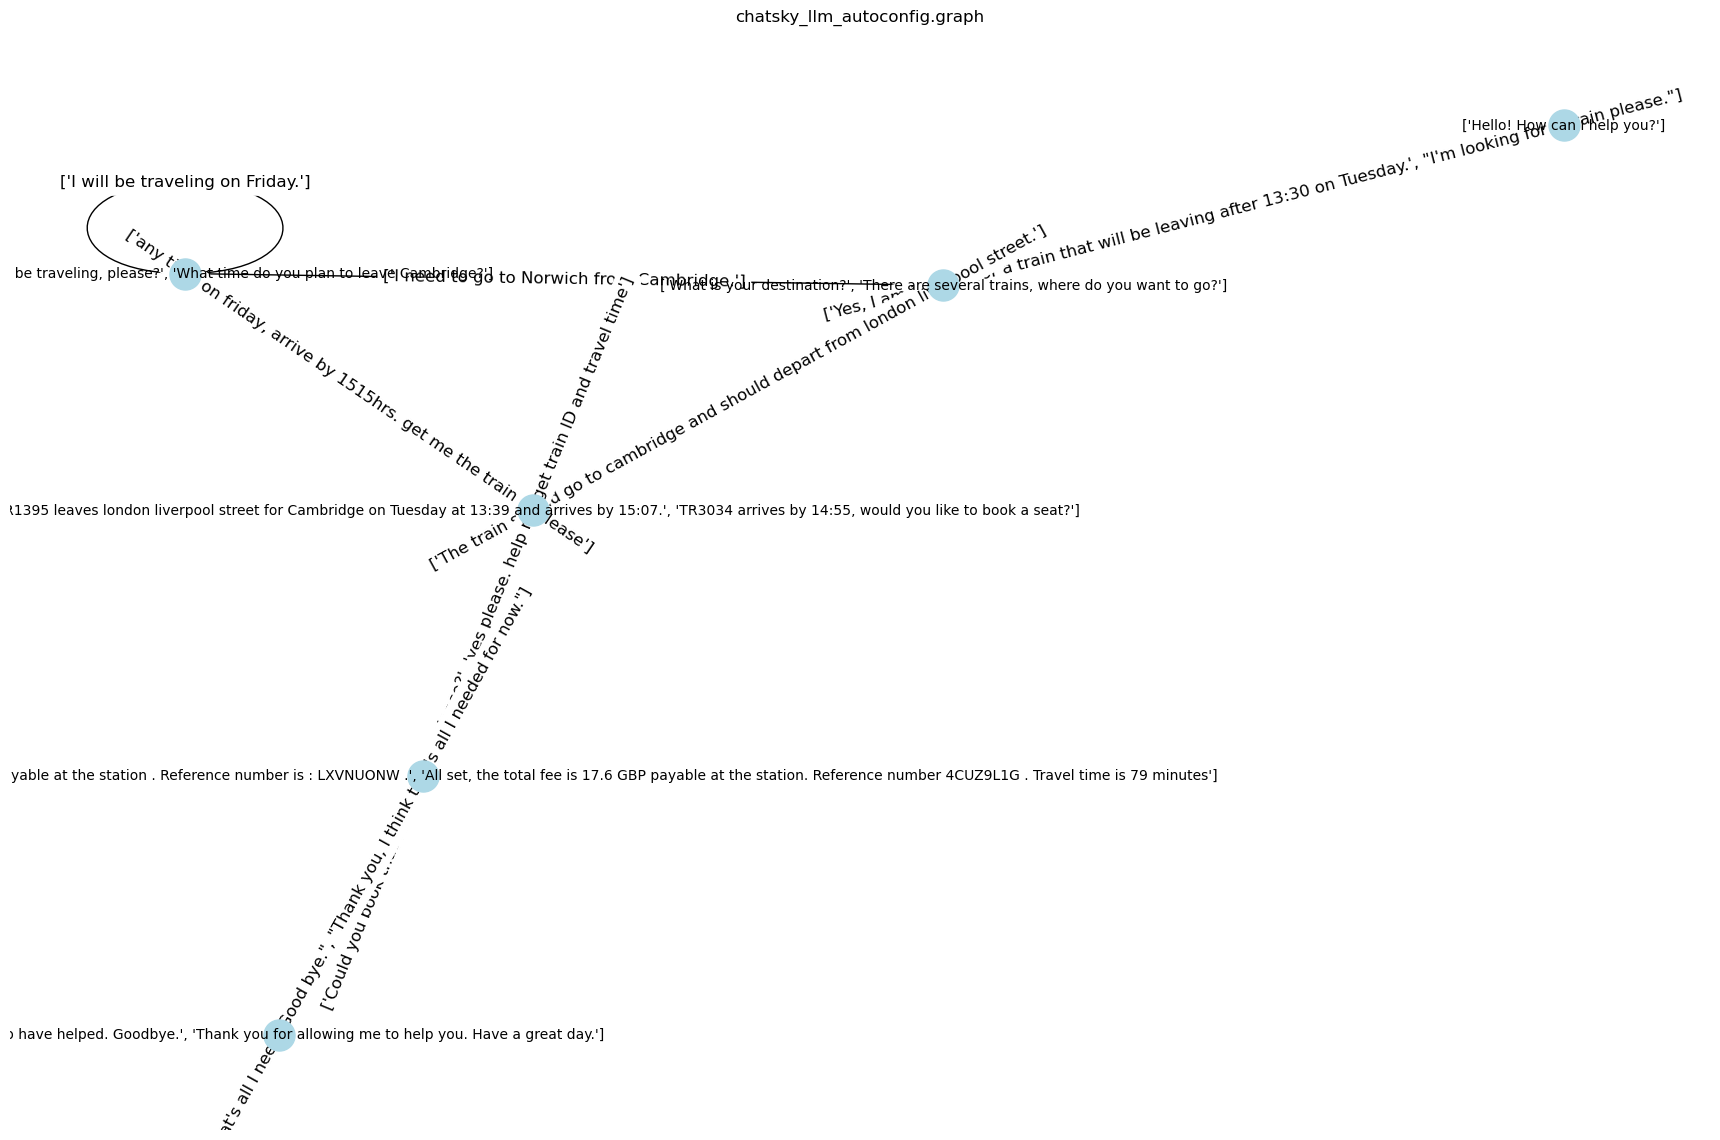

In [80]:
result_graph.visualise()

In [94]:
result_graph = graph_generator.invoke([Dialogue.from_list(c) for c in new_data[:2]+[new_data[4]]])

NODES:  {'nodes': [{'id': 1, 'label': 'start', 'is_start': True, 'utterances': ['Hello! How can I help you?']}, {'id': 2, 'label': 'ask_destination', 'is_start': False, 'utterances': ['What is your destination?', 'There are several trains, where do you want to go?', 'I have found the listings for the Sunday departures. What is your destination? Would you like me to book a trip?']}, {'id': 3, 'label': 'ask_booking_details', 'is_start': False, 'utterances': ['What day will you be traveling, please?', 'What time do you plan to leave Cambridge?', 'For how many tickets?']}, {'id': 4, 'label': 'provide_train_info', 'is_start': False, 'utterances': ['TR1395 leaves london liverpool street for Cambridge on Tuesday at 13:39 and arrives by 15:07.', 'TR3034 arrives by 14:55, would you like to book a seat?']}, {'id': 5, 'label': 'confirm_booking', 'is_start': False, 'utterances': ['Booking was successful, the total fee is 132.8 GBP payable at the station . Reference number is : LXVNUONW .', 'All se

In [95]:
all_utterances_present(result_graph, [Dialogue.from_list(c) for c in new_data[:2]])

{'Okay, you too. Thanks again.', 'For how many tickets?', 'I am looking for a train that will depart on Sunday and arrive by 18:00.', "That's all, thank you !", 'I have found the listings for the Sunday departures. What is your destination? Would you like me to book a trip?', 'I am going to Cambridge from Leicester. And, yes, please book it for me.', '7 please', 'thank you!', "You're welcome. Good-bye.", 'Excellent. Have a great day!', 'Your booking was successful. Train ID is TR1079. Total fee is 211.67 GBP. Reference number is YFF7DKYH . Anything else I can help with today?', "I'm glad I could help. Is there anything else?"}


False

In [96]:
result_graph.graph_dict

{'nodes': [{'id': 1,
   'label': 'start',
   'is_start': True,
   'utterances': ['Hello! How can I help you?']},
  {'id': 2,
   'label': 'ask_destination',
   'is_start': False,
   'utterances': ['What is your destination?',
    'There are several trains, where do you want to go?',
    'I have found the listings for the Sunday departures. What is your destination? Would you like me to book a trip?']},
  {'id': 3,
   'label': 'ask_booking_details',
   'is_start': False,
   'utterances': ['What day will you be traveling, please?',
    'What time do you plan to leave Cambridge?',
    'For how many tickets?']},
  {'id': 4,
   'label': 'provide_train_info',
   'is_start': False,
   'utterances': ['TR1395 leaves london liverpool street for Cambridge on Tuesday at 13:39 and arrives by 15:07.',
    'TR3034 arrives by 14:55, would you like to book a seat?']},
  {'id': 5,
   'label': 'confirm_booking',
   'is_start': False,
   'utterances': ['Booking was successful, the total fee is 132.8 GBP pa

In [105]:
[Dialogue.from_list(c) for c in new_data[:2]+[new_data[4]]]

[Dialogue(messages=[DialogueMessage(text='Hello! How can I help you?', participant='assistant'), DialogueMessage(text='Yes, I am looking for a train that will be leaving after 13:30 on Tuesday.', participant='user'), DialogueMessage(text='What is your destination?', participant='assistant'), DialogueMessage(text='The train should go to cambridge and should depart from london liverpool street.', participant='user'), DialogueMessage(text='TR1395 leaves london liverpool street for Cambridge on Tuesday at 13:39 and arrives by 15:07.', participant='assistant'), DialogueMessage(text='Could you book that for 8 people, please?', participant='user'), DialogueMessage(text='Booking was successful, the total fee is 132.8 GBP payable at the station . Reference number is : LXVNUONW .', participant='assistant'), DialogueMessage(text="Thanks, that's all I need. Good bye.", participant='user'), DialogueMessage(text='Glad to have helped. Goodbye.', participant='assistant')], validate=True),
 Dialogue(me

In [102]:
result_graph = graph_generator.invoke([Dialogue.from_list(c) for c in new_data[:2]+[new_data[4]]])

NODES:  {'nodes': [{'id': 1, 'label': 'start', 'is_start': True, 'utterances': ['Hello! How can I help you?']}, {'id': 2, 'label': 'ask_destination', 'is_start': False, 'utterances': ['What is your destination?', 'There are several trains, where do you want to go?', 'I have found the listings for the Sunday departures. What is your destination? Would you like me to book a trip?']}, {'id': 3, 'label': 'ask_day', 'is_start': False, 'utterances': ['What day will you be traveling, please?']}, {'id': 4, 'label': 'ask_time', 'is_start': False, 'utterances': ['What time do you plan to leave Cambridge?']}, {'id': 5, 'label': 'provide_train_info', 'is_start': False, 'utterances': ['TR1395 leaves london liverpool street for Cambridge on Tuesday at 13:39 and arrives by 15:07.', 'TR3034 arrives by 14:55, would you like to book a seat?']}, {'id': 6, 'label': 'ask_tickets', 'is_start': False, 'utterances': ['For how many tickets?']}, {'id': 7, 'label': 'confirm_booking', 'is_start': False, 'utteranc

In [103]:
all_utterances_present(result_graph, [Dialogue.from_list(c) for c in new_data[:2]+[new_data[4]]])

EQ:  set() {('Hello! How can I help you?', "I'm looking for a train please.", 'What is your destination?'), ('TR1395 leaves london liverpool street for Cambridge on Tuesday at 13:39 and arrives by 15:07.', 'Could you book that for 8 people, please?', 'Your booking was successful. Train ID is TR1079. Total fee is 211.67 GBP. Reference number is YFF7DKYH . Anything else I can help with today?'), ('There are several trains, where do you want to go?', 'The train should go to cambridge and should depart from london liverpool street.', 'TR3034 arrives by 14:55, would you like to book a seat?'), ('TR3034 arrives by 14:55, would you like to book a seat?', 'yes please. help me get train ID and travel time', 'Booking was successful, the total fee is 132.8 GBP payable at the station . Reference number is : LXVNUONW .'), ('Glad to have helped. Goodbye.', 'Okay, you too. Thanks again.', 'Thank you for allowing me to help you. Have a great day.'), ('Hello! How can I help you?', 'I am looking for a t

False

In [104]:
result_graph.graph_dict

{'nodes': [{'id': 1,
   'label': 'start',
   'is_start': True,
   'utterances': ['Hello! How can I help you?']},
  {'id': 2,
   'label': 'ask_destination',
   'is_start': False,
   'utterances': ['What is your destination?',
    'There are several trains, where do you want to go?',
    'I have found the listings for the Sunday departures. What is your destination? Would you like me to book a trip?']},
  {'id': 3,
   'label': 'ask_day',
   'is_start': False,
   'utterances': ['What day will you be traveling, please?']},
  {'id': 4,
   'label': 'ask_time',
   'is_start': False,
   'utterances': ['What time do you plan to leave Cambridge?']},
  {'id': 5,
   'label': 'provide_train_info',
   'is_start': False,
   'utterances': ['TR1395 leaves london liverpool street for Cambridge on Tuesday at 13:39 and arrives by 15:07.',
    'TR3034 arrives by 14:55, would you like to book a seat?']},
  {'id': 6,
   'label': 'ask_tickets',
   'is_start': False,
   'utterances': ['For how many tickets?']}

In [10]:
result_graph = graph_generator.invoke([Dialogue.from_list(c) for c in new_data[:2]+[new_data[4]]])

NODES:  {'nodes': [{'id': 1, 'label': 'start', 'is_start': True, 'utterances': ['Hello! How can I help you?']}, {'id': 2, 'label': 'ask_destination', 'is_start': False, 'utterances': ['What is your destination?', 'There are several trains, where do you want to go?', 'I have found the listings for the Sunday departures. What is your destination? Would you like me to book a trip?']}, {'id': 3, 'label': 'ask_day', 'is_start': False, 'utterances': ['What day will you be traveling, please?']}, {'id': 4, 'label': 'ask_time', 'is_start': False, 'utterances': ['What time do you plan to leave Cambridge?']}, {'id': 5, 'label': 'ask_number_of_tickets', 'is_start': False, 'utterances': ['For how many tickets?']}, {'id': 6, 'label': 'booking_confirmation', 'is_start': False, 'utterances': ['Booking was successful, the total fee is 132.8 GBP payable at the station . Reference number is : LXVNUONW .', 'All set, the total fee is 17.6 GBP payable at the station. Reference number 4CUZ9L1G . Travel time 

/data/home/peshkichev/projects/chatsky-llm-autoconfig/dev_packages/chatsky_llm_autoconfig/chatsky_llm_autoconfig/algorithms/three_stages_0.py:76: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(model_name=env_settings.EMBEDDER_MODEL, model_kwargs={"device": env_settings.EMBEDDER_DEVICE})


RESULT:  {'edges': [{'source': 2, 'target': 7, 'utterances': ['The train should go to cambridge and should depart from london liverpool street.']}, {'source': 7, 'target': 6, 'utterances': ['Could you book that for 8 people, please?']}, {'source': 2, 'target': 3, 'utterances': ['I need to go to Norwich from Cambridge.']}, {'source': 3, 'target': 4, 'utterances': ['I will be traveling on Friday.']}, {'source': 4, 'target': 8, 'utterances': ['any time on friday, arrive by 1515hrs. get me the train id please']}, {'source': 6, 'target': 10, 'utterances': ["Thanks, that's all I need. Good bye.", "Thank you, I think that's all I needed for now."]}, {'source': 8, 'target': 6, 'utterances': ['yes please. help me get train ID and travel time']}, {'source': 1, 'target': 2, 'utterances': ['Yes, I am looking for a train that will be leaving after 13:30 on Tuesday.', "I'm looking for a train please.", 'I am looking for a train that will depart on Sunday and arrive by 18:00.']}, {'source': 2, 'targe

In [22]:
result_graph.graph_dict

{'nodes': [{'id': 1,
   'label': 'start',
   'is_start': True,
   'utterances': ['Hello! How can I help you?']},
  {'id': 2,
   'label': 'ask_destination',
   'is_start': False,
   'utterances': ['What is your destination?',
    'There are several trains, where do you want to go?',
    'I have found the listings for the Sunday departures. What is your destination? Would you like me to book a trip?']},
  {'id': 3,
   'label': 'ask_day',
   'is_start': False,
   'utterances': ['What day will you be traveling, please?']},
  {'id': 4,
   'label': 'ask_time',
   'is_start': False,
   'utterances': ['What time do you plan to leave Cambridge?']},
  {'id': 5,
   'label': 'ask_number_of_tickets',
   'is_start': False,
   'utterances': ['For how many tickets?']},
  {'id': 6,
   'label': 'booking_confirmation',
   'is_start': False,
   'utterances': ['Booking was successful, the total fee is 132.8 GBP payable at the station . Reference number is : LXVNUONW .',
    'All set, the total fee is 17.6 

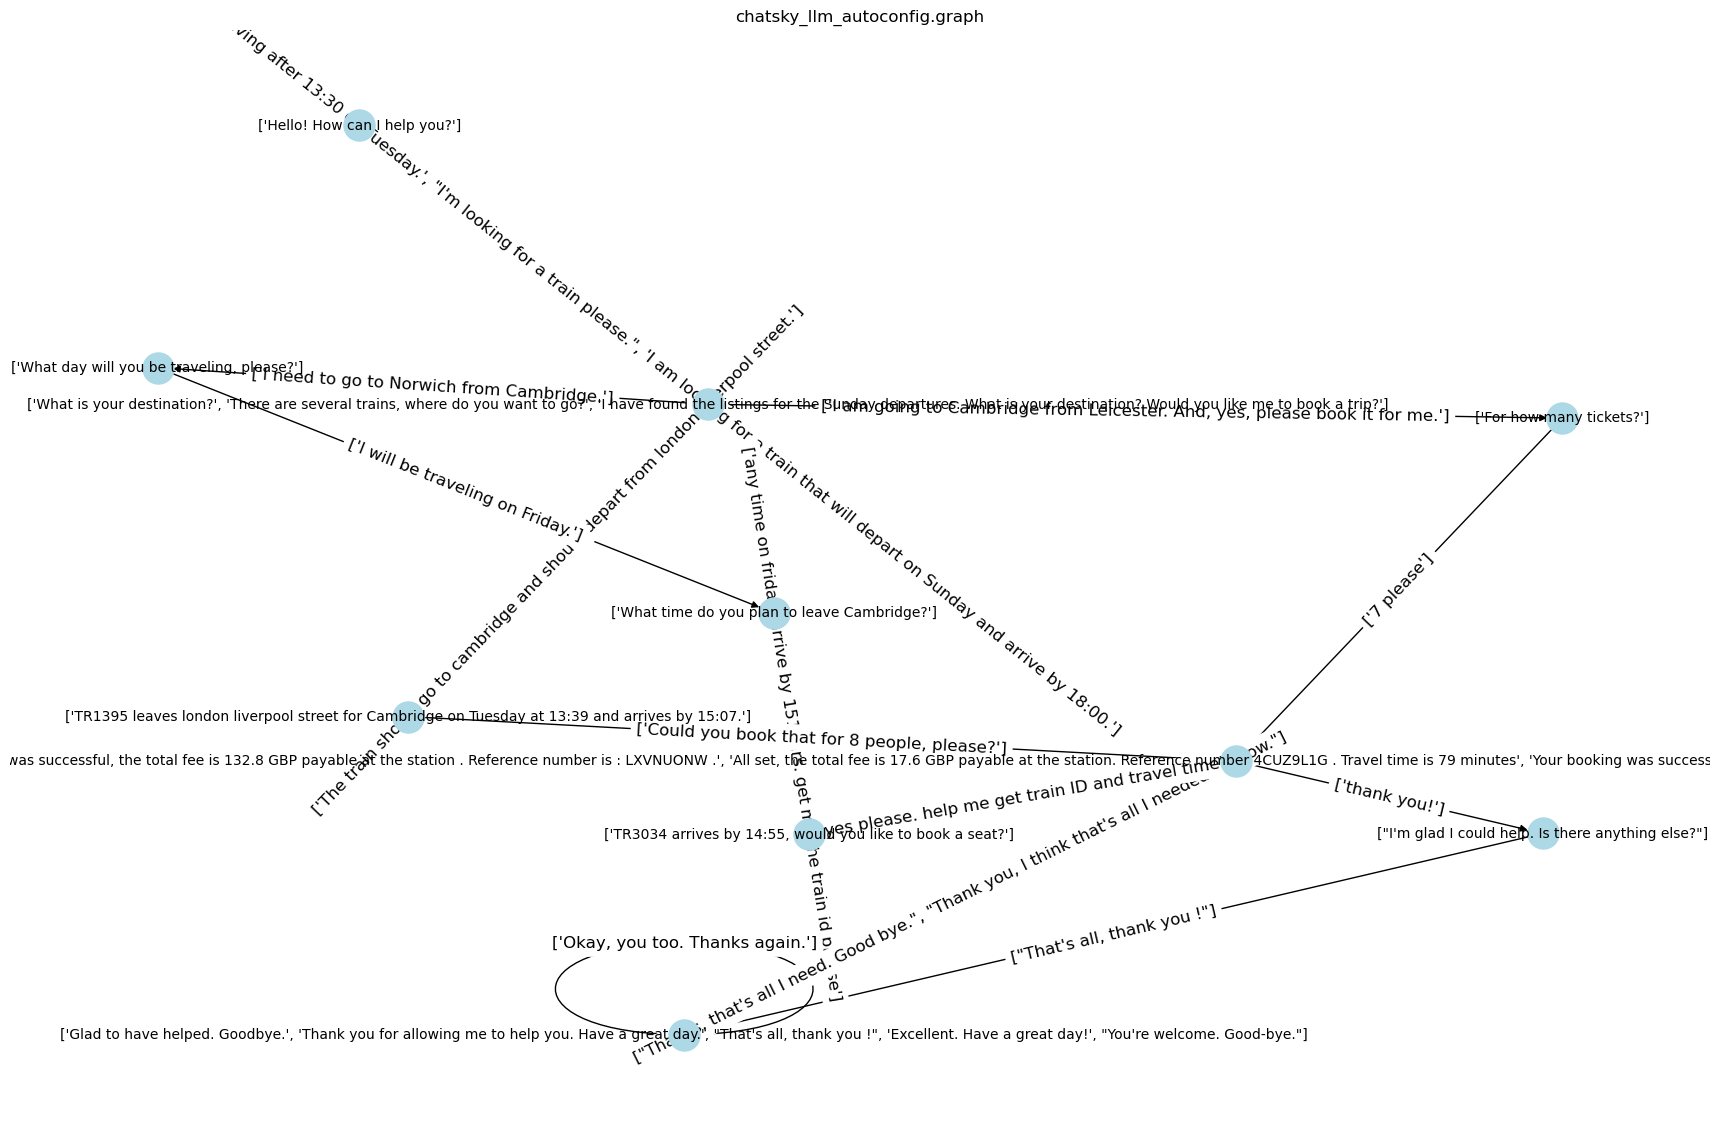

In [33]:
result_graph.visualise()

In [7]:
dataset = load_dataset('microsoft/meta_woz', trust_remote_code=True)

In [46]:
dataset['test'][20]

{'id': 'e5864167',
 'user_id': '76219261',
 'bot_id': 'bcc50983',
 'domain': 'BOOKING_FLIGHT',
 'task_id': '1a04d6c6',
 'turns': ['Hello how may I help you?',
  'Can you help me book a flight',
  'Absolutely. Where do you want to go?',
  'I need a flight to Hawaii, I need to leave by tonight. Also need two tickets',
  'Alright. I found several options for you matching your expedited need for tonight.',
  'Money is of no object btw Great. Can I have two tickets please',
  'Great. The first flight I found is $12,995 for both tickets.',
  'That works fine',
  'Alright. Shall I bill these to your saved credit card?',
  'Yes, thanks',
  'Anytime. Your order has been placed. Sending details to your phone now.',
  'THanks!']}

In [47]:
dataset['test'][0]

{'id': 'e0868745',
 'user_id': 'e918049b',
 'bot_id': '921e27f7',
 'domain': 'BOOKING_FLIGHT',
 'task_id': 'b5ca362f',
 'turns': ['Hello how may I help you?',
  'Hello, I want to book a flight.',
  'Can I help you book a flight to greece?',
  "Yes that's where I want to go.",
  'Perfect, and when would you like to leave?',
  'I want to leave from Dallas.',
  'Alright, i have your flight leaving from dallas and landing in athens. When would you like to fly there?',
  'I want to leave by next Friday.',
  'Alright booking your flight between now and next friday. You will be alerted when your flight is book and vased on the lowest available price.',
  "Wait please don't do that, I was only curious. I don't actually want to book a flight",
  'Flight booking has been cancelled. We hope to see you again soon.']}

In [50]:
dataset['test'][1]

{'id': 'c498ee44',
 'user_id': 'cceee88f',
 'bot_id': '4ec15069',
 'domain': 'BOOKING_FLIGHT',
 'task_id': 'b5ca362f',
 'turns': ['Hello how may I help you?',
  'I need some help with some information please',
  'Sure',
  'how do I get a flight to Greece?',
  'I can book a flight for you',
  "I'm not really ready to book. I was just curious how I would get a flight there",
  'You can check airports has a schedule flight to Greece and there you can book a flight if you want to',
  'Okay, that seems pretty easy',
  'Anything else?',
  'Nope, thanks for your help!',
  'Great']}

In [68]:
dataset['test'][3]

{'id': 'b104d02c',
 'user_id': 'c5d1c254',
 'bot_id': '33753f97',
 'domain': 'BOOKING_FLIGHT',
 'task_id': '9829497e',
 'turns': ['Hello how may I help you?',
  'I need to book a flight real quick',
  'Where would you like to go?',
  'I need to get to anywhere in western Europe as soon as I can but no later than next Tuesday.',
  'Do you prefer a specific airline?',
  'Whichever is cheapest',
  'Is this for a round trip?',
  'no, one way',
  'I have one for $350 on monday at 8pm, will that work?',
  'That will work, please book it for me.',
  'I have booked that airline for you, anything else/',
  "that's all, thanks"]}

In [69]:
dataset['test'][4]

{'id': '29a72036',
 'user_id': '4ec15069',
 'bot_id': '165d979b',
 'domain': 'BOOKING_FLIGHT',
 'task_id': 'b5ca362f',
 'turns': ['Hello how may I help you?',
  'Can you help my about my booked flight?',
  'Sure thing. And what can I help you with today?',
  'I just want to know how to get flight to Greece?',
  "You will need to first make some research for the airport you are going to take. Then, you'll want to find out prices and seating arrangements. Finally, pick your destination and pay for the ticket, then wait at the terminal.",
  'Only that?',
  'You will also be boarding the plane, then fly across the world to reach your destination. You will then get off the plane and will have to find a travel service that can accommodate you to reach your destination.',
  'Amazing details',
  'Is there anything else that I can help you with today?',
  'Nothing',
  'I wish you luck on your flight to Greece~!']}

In [70]:
dataset['test'][5]

{'id': 'bd9ab1b7',
 'user_id': '3205aff7',
 'bot_id': '46fe62d7',
 'domain': 'BOOKING_FLIGHT',
 'task_id': 'b5ca362f',
 'turns': ['Hello how may I help you?',
  'Can you help me book a flight?',
  'Certainly, where would you like to go?',
  'I want a flight to Greece',
  'Great. Can I book a flight to Greece for you today?',
  'I am just curious about info, I do not want to book are you there?',
  'Okay, I see two options for you. Two flights would be 1,230 round trip Two people sorry',
  'Is that in first class or coach?',
  'That is coach. First class would be 8000 Let me know if you would to book in the future',
  'That is helpful, thank you',
  'No problem!',
  'I will probably book it later',
  'I will be here when you do!',
  'Good to know! Goodbye',
  'goodbye',
  'farewell bye']}

In [62]:
new_data=[]
for d in dataset['test']['turns'][1:3]:
    print(d)
    exist = [[{"text":a,"participant":"assistant"},{"text":u,"participant":"user"}] for a,u in zip(d[0:-1:2],d[1::2])]+[[{"text":d[-1],"participant":"assistant"}]]
    new_data.append([x for xs in exist for x in xs])

['Hello how may I help you?', 'I need some help with some information please', 'Sure', 'how do I get a flight to Greece?', 'I can book a flight for you', "I'm not really ready to book. I was just curious how I would get a flight there", 'You can check airports has a schedule flight to Greece and there you can book a flight if you want to', 'Okay, that seems pretty easy', 'Anything else?', 'Nope, thanks for your help!', 'Great']
['Hello how may I help you?', 'I need some travel information please.', 'sure what do you wanna know?', 'I need to know how I would go about getting a flight to Greece when I need to go.', 'i can book you a flight there to save you some time', "Well that's good to hear, but I don't want to book a flight today. I just want to know what I need to do.", 'ohh okay anything else you need to know?', 'Just for my own information, can you tell me how much a flight to Greece costs right now?', '$40', 'That is a great price. Thanks for the information.', 'have a good day'

In [63]:
new_data

[[{'text': 'Hello how may I help you?', 'participant': 'assistant'},
  {'text': 'I need some help with some information please',
   'participant': 'user'},
  {'text': 'Sure', 'participant': 'assistant'},
  {'text': 'how do I get a flight to Greece?', 'participant': 'user'},
  {'text': 'I can book a flight for you', 'participant': 'assistant'},
  {'text': "I'm not really ready to book. I was just curious how I would get a flight there",
   'participant': 'user'},
  {'text': 'You can check airports has a schedule flight to Greece and there you can book a flight if you want to',
   'participant': 'assistant'},
  {'text': 'Okay, that seems pretty easy', 'participant': 'user'},
  {'text': 'Anything else?', 'participant': 'assistant'},
  {'text': 'Nope, thanks for your help!', 'participant': 'user'},
  {'text': 'Great', 'participant': 'assistant'}],
 [{'text': 'Hello how may I help you?', 'participant': 'assistant'},
  {'text': 'I need some travel information please.', 'participant': 'user'}

In [64]:
result_graph = graph_generator.invoke([Dialogue.from_list(c) for c in new_data])

NODES:  {'nodes': [{'id': 1, 'label': 'start', 'is_start': True, 'utterances': ['Hello how may I help you?']}, {'id': 2, 'label': 'ask_info', 'is_start': False, 'utterances': ['Sure', 'sure what do you wanna know?']}, {'id': 3, 'label': 'offer_booking', 'is_start': False, 'utterances': ['I can book a flight for you', 'i can book you a flight there to save you some time']}, {'id': 4, 'label': 'ask_anything_else', 'is_start': False, 'utterances': ['Anything else?', 'ohh okay anything else you need to know?']}, {'id': 5, 'label': 'end_conversation', 'is_start': False, 'utterances': ['Great', 'have a good day']}, {'id': 6, 'label': 'provide_flight_info', 'is_start': False, 'utterances': ['You can check airports has a schedule flight to Greece and there you can book a flight if you want to']}, {'id': 7, 'label': 'provide_price', 'is_start': False, 'utterances': ['$40']}], 'reason': "Assistant's utterances 'You can check airports has a schedule flight to Greece and there you can book a fligh

/data/home/peshkichev/projects/chatsky-llm-autoconfig/dev_packages/chatsky_llm_autoconfig/chatsky_llm_autoconfig/vectors.py:47: UserWarning: Relevance scores must be between 0 and 1, got [(Document(id='5', metadata={'id': 5}, page_content='Great'), 0.9999999999990536), (Document(id='1', metadata={'id': 1}, page_content='Sure'), 0.3456119720705767), (Document(id='4', metadata={'id': 4}, page_content='Anything else?'), 0.21399920743548617), (Document(id='2', metadata={'id': 2}, page_content='I can book a flight for you'), 0.15012144383237513), (Document(id='0', metadata={'id': 0}, page_content='Hello how may I help you?'), 0.14096091060222937), (Document(id='3', metadata={'id': 3}, page_content='You can check airports has a schedule flight to Greece and there you can book a flight if you want to'), -0.0019150513883670062)]
  docs = self.assistant_store.similarity_search_with_relevance_scores(utterance, k=self.assistant_size, score_threshold=env_settings.EMBEDDER_TYPO)
/data/home/peshkich

RESULT:  {'edges': [{'source': 3, 'target': 6, 'utterances': ["I'm not really ready to book. I was just curious how I would get a flight there"]}, {'source': 4, 'target': 5, 'utterances': ['Nope, thanks for your help!']}, {'source': 6, 'target': 4, 'utterances': ['Okay, that seems pretty easy']}, {'source': 1, 'target': 2, 'utterances': ['I need some help with some information please', 'I need some travel information please.']}, {'source': 2, 'target': 3, 'utterances': ['how do I get a flight to Greece?', 'I need to know how I would go about getting a flight to Greece when I need to go.']}, {'source': 3, 'target': 4, 'utterances': ["Well that's good to hear, but I don't want to book a flight today. I just want to know what I need to do."]}, {'source': 4, 'target': 7, 'utterances': ['Just for my own information, can you tell me how much a flight to Greece costs right now?']}, {'source': 7, 'target': 5, 'utterances': ['That is a great price. Thanks for the information.']}], 'nodes': [{'i

In [65]:
result_graph.graph_dict

{'nodes': [{'id': 1,
   'label': 'start',
   'is_start': True,
   'utterances': ['Hello how may I help you?']},
  {'id': 2,
   'label': 'ask_info',
   'is_start': False,
   'utterances': ['Sure', 'sure what do you wanna know?']},
  {'id': 3,
   'label': 'offer_booking',
   'is_start': False,
   'utterances': ['I can book a flight for you',
    'i can book you a flight there to save you some time']},
  {'id': 4,
   'label': 'ask_anything_else',
   'is_start': False,
   'utterances': ['Anything else?',
    'ohh okay anything else you need to know?']},
  {'id': 5,
   'label': 'end_conversation',
   'is_start': False,
   'utterances': ['Great', 'have a good day']},
  {'id': 6,
   'label': 'provide_flight_info',
   'is_start': False,
   'utterances': ['You can check airports has a schedule flight to Greece and there you can book a flight if you want to']},
  {'id': 7,
   'label': 'provide_price',
   'is_start': False,
   'utterances': ['$40']}],
 'edges': [{'source': 3,
   'target': 6,
   '

In [66]:
all_utterances_present(result_graph, [Dialogue.from_list(c) for c in new_data])

EQ:  set() {('Anything else?', 'Just for my own information, can you tell me how much a flight to Greece costs right now?', '$40'), ('Anything else?', 'Nope, thanks for your help!', 'have a good day'), ('ohh okay anything else you need to know?', 'Nope, thanks for your help!', 'Great'), ('Sure', 'how do I get a flight to Greece?', 'i can book you a flight there to save you some time'), ('I can book a flight for you', "Well that's good to hear, but I don't want to book a flight today. I just want to know what I need to do.", 'ohh okay anything else you need to know?'), ('sure what do you wanna know?', 'how do I get a flight to Greece?', 'i can book you a flight there to save you some time'), ('Sure', 'I need to know how I would go about getting a flight to Greece when I need to go.', 'i can book you a flight there to save you some time'), ('Hello how may I help you?', 'I need some help with some information please', 'sure what do you wanna know?'), ('I can book a flight for you', "Well 

False

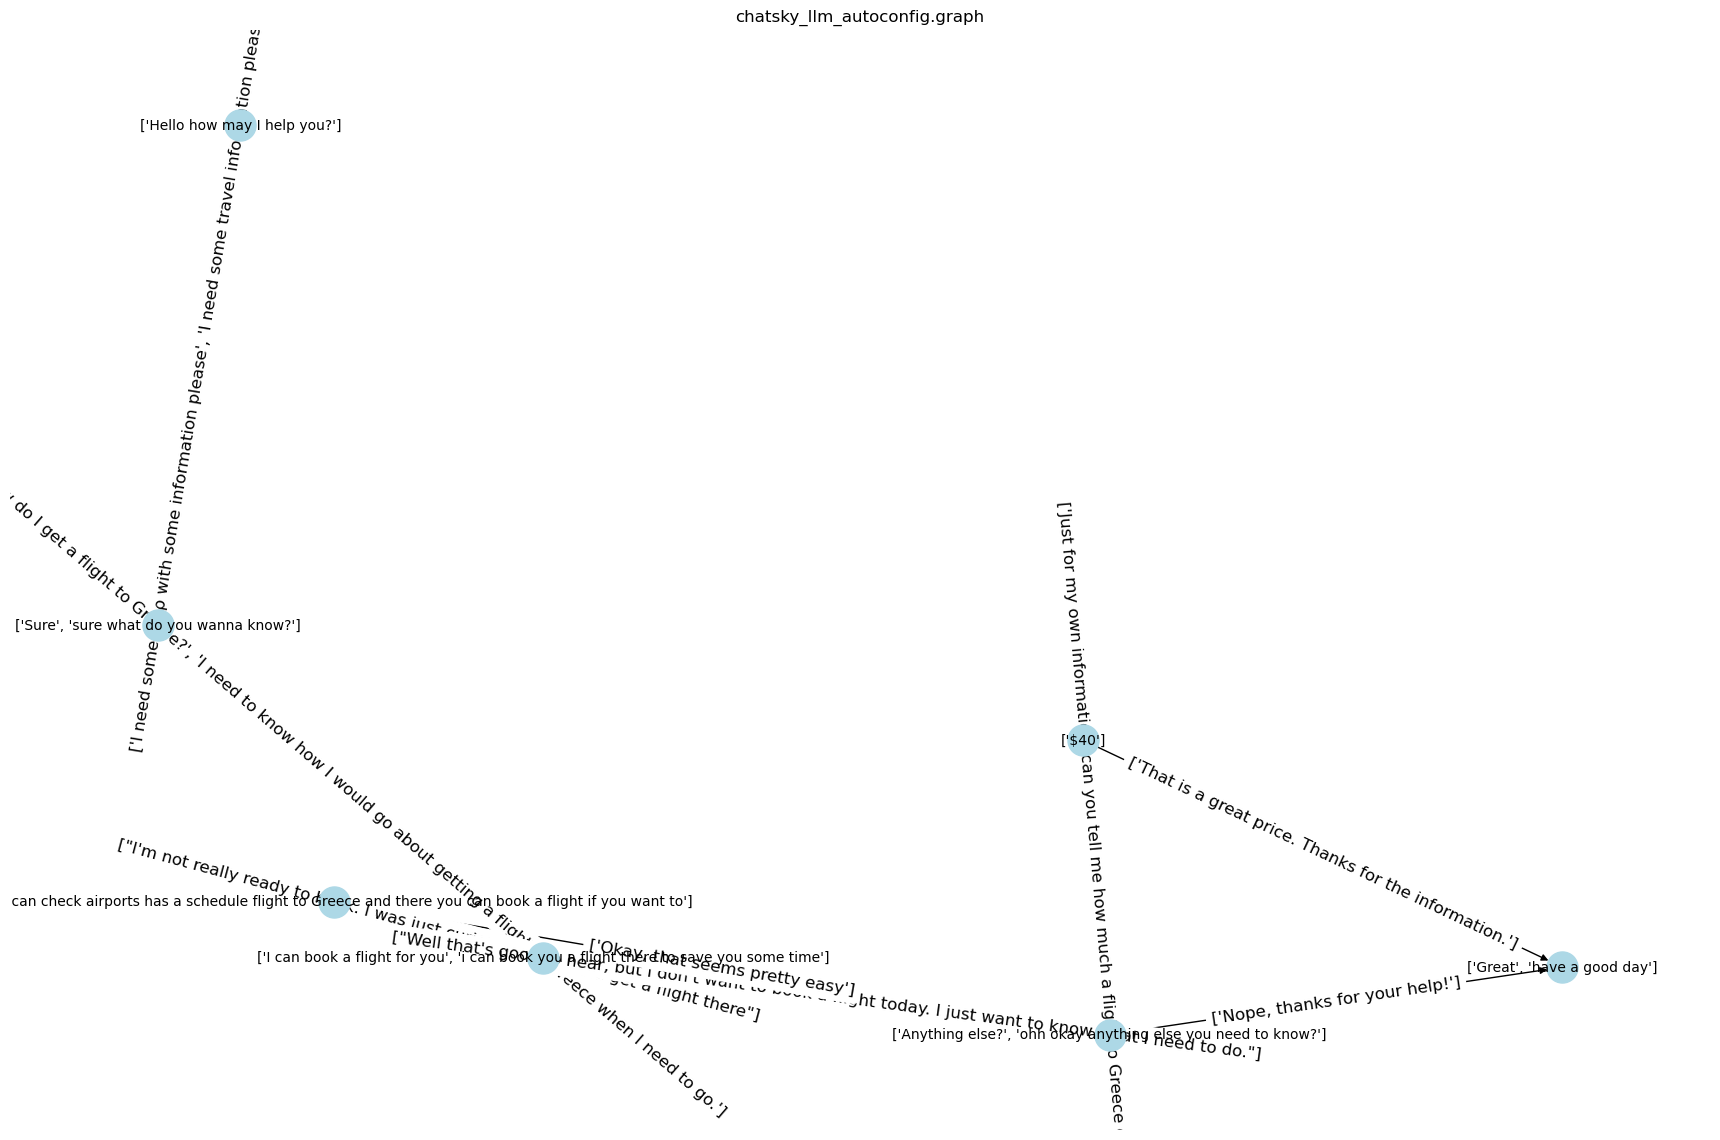

In [67]:
result_graph.visualise()

In [8]:
new_data=[]
for d in dataset['test']['turns']:
    exist = [[{"text":a,"participant":"assistant"},{"text":u,"participant":"user"}] for a,u in zip(d[0:-1:2],d[1::2])]+[[{"text":d[-1],"participant":"assistant"}]]
    new_data.append([x for xs in exist for x in xs])

In [72]:
new_data[1:3]+new_data[4:6]

[[{'text': 'Hello how may I help you?', 'participant': 'assistant'},
  {'text': 'I need some help with some information please',
   'participant': 'user'},
  {'text': 'Sure', 'participant': 'assistant'},
  {'text': 'how do I get a flight to Greece?', 'participant': 'user'},
  {'text': 'I can book a flight for you', 'participant': 'assistant'},
  {'text': "I'm not really ready to book. I was just curious how I would get a flight there",
   'participant': 'user'},
  {'text': 'You can check airports has a schedule flight to Greece and there you can book a flight if you want to',
   'participant': 'assistant'},
  {'text': 'Okay, that seems pretty easy', 'participant': 'user'},
  {'text': 'Anything else?', 'participant': 'assistant'},
  {'text': 'Nope, thanks for your help!', 'participant': 'user'},
  {'text': 'Great', 'participant': 'assistant'}],
 [{'text': 'Hello how may I help you?', 'participant': 'assistant'},
  {'text': 'I need some travel information please.', 'participant': 'user'}

In [10]:
result_graph = graph_generator.invoke([Dialogue.from_list(c) for c in new_data[1:3]+new_data[4:6]])

NODES:  {'nodes': [{'id': 1, 'label': 'start', 'is_start': True, 'utterances': ['Hello how may I help you?']}, {'id': 2, 'label': 'ask_information', 'is_start': False, 'utterances': ['Sure', 'sure what do you wanna know?', 'Sure thing. And what can I help you with today?', 'Certainly, where would you like to go?']}, {'id': 3, 'label': 'offer_booking', 'is_start': False, 'utterances': ['I can book a flight for you', 'i can book you a flight there to save you some time', 'Great. Can I book a flight to Greece for you today?']}, {'id': 4, 'label': 'provide_flight_info', 'is_start': False, 'utterances': ['You can check airports has a schedule flight to Greece and there you can book a flight if you want to', "You will need to first make some research for the airport you are going to take. Then, you'll want to find out prices and seating arrangements. Finally, pick your destination and pay for the ticket, then wait at the terminal.", 'You will also be boarding the plane, then fly across the w

/data/home/peshkichev/projects/chatsky-llm-autoconfig/dev_packages/chatsky_llm_autoconfig/chatsky_llm_autoconfig/algorithms/three_stages_0.py:76: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(model_name=env_settings.EMBEDDER_MODEL, model_kwargs={"device": env_settings.EMBEDDER_DEVICE})
/data/home/peshkichev/projects/chatsky-llm-autoconfig/dev_packages/chatsky_llm_autoconfig/chatsky_llm_autoconfig/vectors.py:47: UserWarning: Relevance scores must be between 0 and 1, got [(Document(id='3', metadata={'id': 3}, page_content='You can check airports has a schedule flight to Greece and there you can book a flight if you want 

RESULT:  {'edges': [{'source': 3, 'target': 4, 'utterances': ["I'm not really ready to book. I was just curious how I would get a flight there"]}, {'source': 3, 'target': 5, 'utterances': ["Well that's good to hear, but I don't want to book a flight today. I just want to know what I need to do."]}, {'source': 5, 'target': 8, 'utterances': ['Just for my own information, can you tell me how much a flight to Greece costs right now?']}, {'source': 2, 'target': 4, 'utterances': ['I just want to know how to get flight to Greece?']}, {'source': 4, 'target': 4, 'utterances': ['Only that?']}, {'source': 4, 'target': 5, 'utterances': ['Okay, that seems pretty easy', 'Amazing details']}, {'source': 5, 'target': 6, 'utterances': ['Nope, thanks for your help!', 'Nothing']}, {'source': 1, 'target': 2, 'utterances': ['I need some help with some information please', 'I need some travel information please.', 'Can you help my about my booked flight?', 'Can you help me book a flight?']}, {'source': 2, 't

In [75]:
result_graph.graph_dict

{'nodes': [{'id': 1,
   'label': 'start',
   'is_start': True,
   'utterances': ['Hello how may I help you?']},
  {'id': 2,
   'label': 'ask_info',
   'is_start': False,
   'utterances': ['Sure',
    'sure what do you wanna know?',
    'Sure thing. And what can I help you with today?',
    'Certainly, where would you like to go?']},
  {'id': 3,
   'label': 'offer_booking',
   'is_start': False,
   'utterances': ['I can book a flight for you',
    'i can book you a flight there to save you some time',
    'Great. Can I book a flight to Greece for you today?']},
  {'id': 4,
   'label': 'provide_info',
   'is_start': False,
   'utterances': ['You can check airports has a schedule flight to Greece and there you can book a flight if you want to',
    "You will need to first make some research for the airport you are going to take. Then, you'll want to find out prices and seating arrangements. Finally, pick your destination and pay for the ticket, then wait at the terminal.",
    'You will a

In [10]:
result_graph = graph_generator.invoke([Dialogue.from_list(c) for c in new_data[1:3]+new_data[4:6]])

NODES:  {'nodes': [{'id': 1, 'label': 'start', 'is_start': True, 'utterances': ['Hello how may I help you?']}, {'id': 2, 'label': 'confirm_help', 'is_start': False, 'utterances': ['Sure', 'sure what do you wanna know?', 'Sure thing. And what can I help you with today?']}, {'id': 3, 'label': 'offer_booking', 'is_start': False, 'utterances': ['I can book a flight for you', 'i can book you a flight there to save you some time', 'Great. Can I book a flight to Greece for you today?']}, {'id': 4, 'label': 'provide_info', 'is_start': False, 'utterances': ['You can check airports has a schedule flight to Greece and there you can book a flight if you want to', '$40', "You will need to first make some research for the airport you are going to take. Then, you'll want to find out prices and seating arrangements. Finally, pick your destination and pay for the ticket, then wait at the terminal.", 'You will also be boarding the plane, then fly across the world to reach your destination. You will then

/data/home/peshkichev/projects/chatsky-llm-autoconfig/dev_packages/chatsky_llm_autoconfig/chatsky_llm_autoconfig/algorithms/three_stages_0.py:76: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(model_name=env_settings.EMBEDDER_MODEL, model_kwargs={"device": env_settings.EMBEDDER_DEVICE})
/data/home/peshkichev/projects/chatsky-llm-autoconfig/dev_packages/chatsky_llm_autoconfig/chatsky_llm_autoconfig/vectors.py:47: UserWarning: Relevance scores must be between 0 and 1, got [(Document(id='3', metadata={'id': 3}, page_content='You can check airports has a schedule flight to Greece and there you can book a flight if you want 

RESULT:  {'edges': [{'source': 2, 'target': 3, 'utterances': ['how do I get a flight to Greece?', 'I need to know how I would go about getting a flight to Greece when I need to go.']}, {'source': 3, 'target': 5, 'utterances': ["Well that's good to hear, but I don't want to book a flight today. I just want to know what I need to do."]}, {'source': 5, 'target': 4, 'utterances': ['Just for my own information, can you tell me how much a flight to Greece costs right now?']}, {'source': 1, 'target': 2, 'utterances': ['I need some help with some information please', 'I need some travel information please.', 'Can you help my about my booked flight?']}, {'source': 2, 'target': 4, 'utterances': ['I just want to know how to get flight to Greece?']}, {'source': 4, 'target': 5, 'utterances': ['Okay, that seems pretty easy', 'Amazing details']}, {'source': 5, 'target': 6, 'utterances': ['Nope, thanks for your help!', 'Nothing']}, {'source': 1, 'target': 7, 'utterances': ['Can you help me book a flig

In [13]:
all_utterances_present(result_graph, [Dialogue.from_list(c) for c in new_data[1:3]+new_data[4:6]])

False

In [12]:
result_graph.graph_dict

{'nodes': [{'id': 1,
   'label': 'start',
   'is_start': True,
   'utterances': ['Hello how may I help you?']},
  {'id': 2,
   'label': 'ask_information',
   'is_start': False,
   'utterances': ['Sure',
    'sure what do you wanna know?',
    'Sure thing. And what can I help you with today?',
    'Certainly, where would you like to go?']},
  {'id': 3,
   'label': 'offer_booking',
   'is_start': False,
   'utterances': ['I can book a flight for you',
    'i can book you a flight there to save you some time',
    'Great. Can I book a flight to Greece for you today?']},
  {'id': 4,
   'label': 'provide_flight_info',
   'is_start': False,
   'utterances': ['You can check airports has a schedule flight to Greece and there you can book a flight if you want to',
    "You will need to first make some research for the airport you are going to take. Then, you'll want to find out prices and seating arrangements. Finally, pick your destination and pay for the ticket, then wait at the terminal.",
 

In [9]:
result_graph = graph_generator.invoke([Dialogue.from_list(c) for c in new_data[1:3]+new_data[4:6]])

NODES:  {'nodes': [{'id': 1, 'label': 'start', 'is_start': True, 'utterances': ['Hello how may I help you?']}, {'id': 2, 'label': 'help_prompt', 'is_start': False, 'utterances': ['Sure', 'sure what do you wanna know?', 'Sure thing. And what can I help you with today?', 'Certainly, where would you like to go?']}, {'id': 3, 'label': 'offer_booking', 'is_start': False, 'utterances': ['I can book a flight for you', 'i can book you a flight there to save you some time', 'Great. Can I book a flight to Greece for you today?']}, {'id': 4, 'label': 'provide_information', 'is_start': False, 'utterances': ['You can check airports has a schedule flight to Greece and there you can book a flight if you want to', "You will need to first make some research for the airport you are going to take. Then, you'll want to find out prices and seating arrangements. Finally, pick your destination and pay for the ticket, then wait at the terminal.", 'You will also be boarding the plane, then fly across the world

/data/home/peshkichev/projects/chatsky-llm-autoconfig/dev_packages/chatsky_llm_autoconfig/chatsky_llm_autoconfig/algorithms/three_stages_0.py:76: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(model_name=env_settings.EMBEDDER_MODEL, model_kwargs={"device": env_settings.EMBEDDER_DEVICE})
/data/home/peshkichev/projects/chatsky-llm-autoconfig/dev_packages/chatsky_llm_autoconfig/chatsky_llm_autoconfig/vectors.py:47: UserWarning: Relevance scores must be between 0 and 1, got [(Document(id='3', metadata={'id': 3}, page_content='You can check airports has a schedule flight to Greece and there you can book a flight if you want 

RESULT:  {'edges': [{'source': 3, 'target': 4, 'utterances': ["I'm not really ready to book. I was just curious how I would get a flight there"]}, {'source': 3, 'target': 5, 'utterances': ["Well that's good to hear, but I don't want to book a flight today. I just want to know what I need to do."]}, {'source': 5, 'target': 11, 'utterances': ['Just for my own information, can you tell me how much a flight to Greece costs right now?']}, {'source': 11, 'target': 6, 'utterances': ['That is a great price. Thanks for the information.']}, {'source': 2, 'target': 4, 'utterances': ['I just want to know how to get flight to Greece?']}, {'source': 4, 'target': 4, 'utterances': ['Only that?']}, {'source': 4, 'target': 5, 'utterances': ['Okay, that seems pretty easy', 'Amazing details']}, {'source': 5, 'target': 6, 'utterances': ['Nope, thanks for your help!', 'Nothing']}, {'source': 1, 'target': 2, 'utterances': ['I need some help with some information please', 'I need some travel information pleas

In [10]:
all_utterances_present(result_graph, [Dialogue.from_list(c) for c in new_data[1:3]+new_data[4:6]])

False

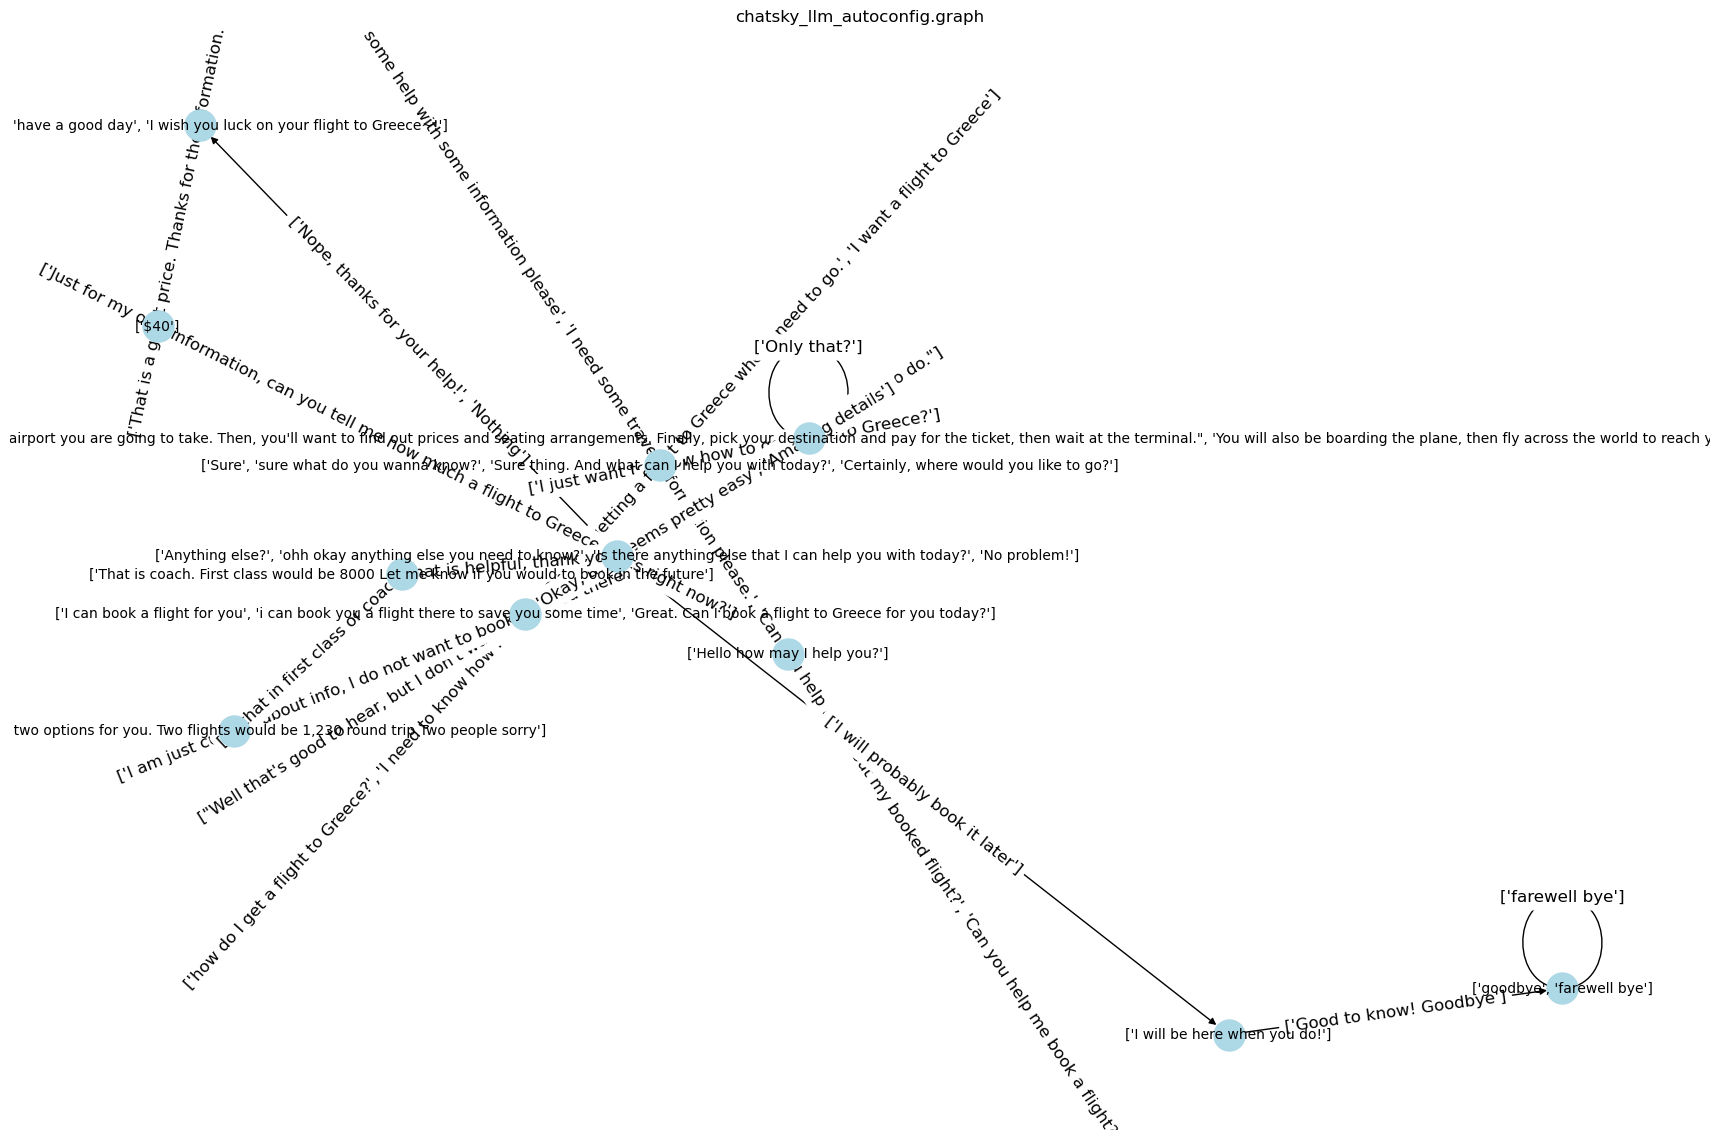

In [22]:
result_graph.visualise()